In [1]:
# allows to import own functions
import sys, os
path_name = os.getcwd()
root_project = os.path.split(path_name)[0]
sys.path.append(root_project)

from src.utils.help_func import results_searchcv

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.ticker import PercentFormatter
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
import joblib
sns.set()
%matplotlib inline

In [3]:
# pd.set_option('display.max_rows', 500)
# pd.reset_option('display.max_rows')

In [4]:
df = pd.read_pickle('../data/processed/simulation_results.pickle')
df

,initial_country,idx_country,R0,Tc,Tr,omega,total_infected,total_death,total_recovered
0,ESP,170,1,5.0,5.0,0.01,1.000000e+00,0.000000e+00,0.000000e+00
1,ESP,170,1,5.0,5.0,0.06,1.000000e+00,0.000000e+00,0.000000e+00
2,ESP,170,1,5.0,5.0,0.11,1.000000e+00,0.000000e+00,0.000000e+00
3,ESP,170,1,5.0,5.0,0.16,1.000000e+00,0.000000e+00,0.000000e+00
4,CHN,39,1,5.0,5.0,0.01,1.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...
1995,AUT,10,20,1.0,20.0,0.16,1.444776e+10,1.118887e+10,3.496521e+09
1996,MMR,130,20,1.0,20.0,0.01,1.433280e+10,2.424315e+09,1.212159e+10
1997,MMR,130,20,1.0,20.0,0.06,1.434552e+10,7.978767e+09,6.648968e+09
1998,MMR,130,20,1.0,20.0,0.11,1.434478e+10,1.010762e+10,4.594368e+09


In [5]:
df['total_death'] = df['total_death'] / 1000

In [6]:
df['R0'].value_counts()

20    200
15    200
10    200
8     200
6     200
5     200
4     200
3     200
2     200
1     200
Name: R0, dtype: int64

In [7]:
df['omega'].value_counts()

0.06    500
0.16    500
0.01    500
0.11    500
Name: omega, dtype: int64

In [8]:
set(df['R0'])

{1, 2, 3, 4, 5, 6, 8, 10, 15, 20}

In [9]:
for i in set(df['R0']):
    print(df.loc[df['R0'] == i, :].describe())

       idx_country     R0          Tc          Tr       omega  total_infected  \
count   200.000000  200.0  200.000000  200.000000  200.000000           200.0   
mean    108.800000    1.0   12.500000   12.500000    0.085000             1.0   
std      72.650883    0.0    4.799148    4.799148    0.056042             0.0   
min      10.000000    1.0    5.000000    5.000000    0.010000             1.0   
25%      39.000000    1.0    8.333333    8.333333    0.047500             1.0   
50%     130.000000    1.0   12.500000   12.500000    0.085000             1.0   
75%     170.000000    1.0   16.666667   16.666667    0.122500             1.0   
max     195.000000    1.0   20.000000   20.000000    0.160000             1.0   

       total_death  total_recovered  
count        200.0            200.0  
mean           0.0              0.0  
std            0.0              0.0  
min            0.0              0.0  
25%            0.0              0.0  
50%            0.0              0.0  
75% 

In [10]:
for i in set(df['omega']):
    print(f'Death rate: {i}\n')
    print(df.loc[df['omega'] == i, :].describe())
    print('===========')

Death rate: 0.060000000000000005

       idx_country          R0          Tc          Tr         omega  \
count   500.000000  500.000000  500.000000  500.000000  5.000000e+02   
mean    108.800000    7.400000    3.489583   12.500000  6.000000e-02   
std      72.541606    5.771188    3.893248    4.791930  6.945843e-18   
min      10.000000    1.000000    0.250000    5.000000  6.000000e-02   
25%      39.000000    3.000000    1.031250    8.333333  6.000000e-02   
50%     130.000000    5.500000    2.083333   12.500000  6.000000e-02   
75%     170.000000   10.000000    4.166667   16.666667  6.000000e-02   
max     195.000000   20.000000   20.000000   20.000000  6.000000e-02   

       total_infected   total_death  total_recovered  
count    5.000000e+02  5.000000e+02     5.000000e+02  
mean     1.137126e+10  4.688458e+06     6.811388e+09  
std      5.133383e+09  2.470284e+06     3.335043e+09  
min      1.000000e+00  0.000000e+00     0.000000e+00  
25%      1.126525e+10  3.350786e+06     6.

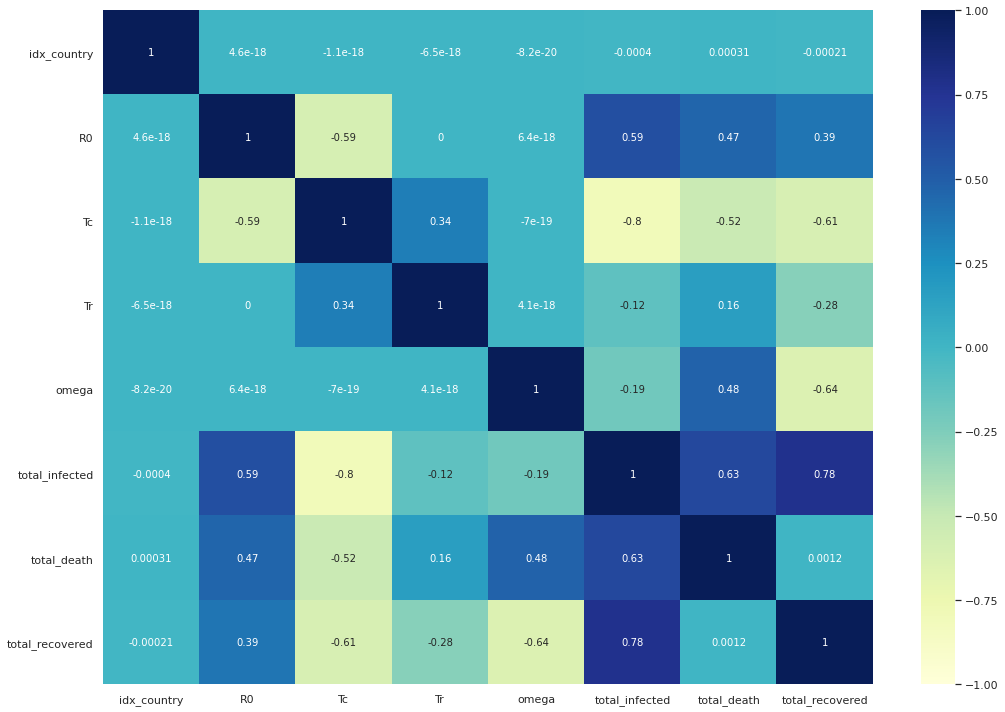

In [11]:
corr_matrix = df.corr()
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
sns.heatmap(corr_matrix, vmax=1, vmin=-1, annot=True, cmap="YlGnBu", ax=ax)
plt.tight_layout()

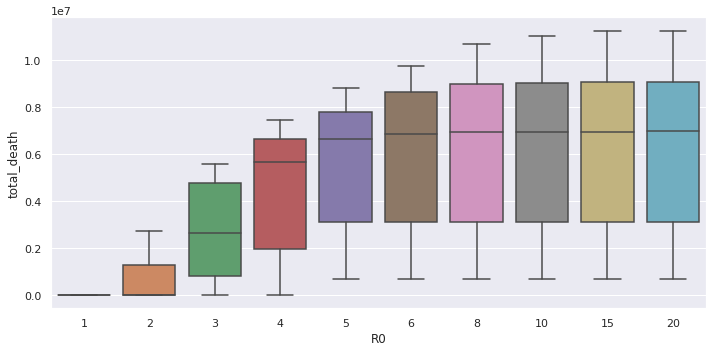

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.boxplot(x=df['R0'], y=df['total_death'], ax=ax)
plt.tight_layout()

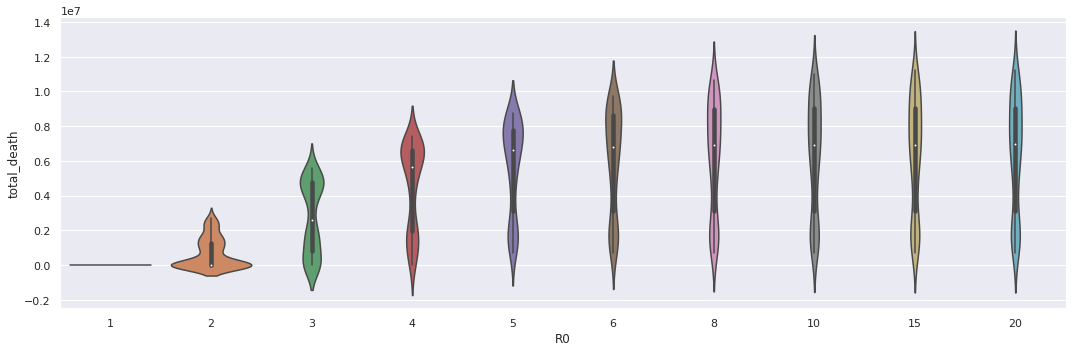

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.violinplot(x=df['R0'], y=df['total_death'], ax=ax)
plt.tight_layout()

Vemos como hay una relación positiva, pero mucha varianza, debido a que la variable de muertos depende del omega.

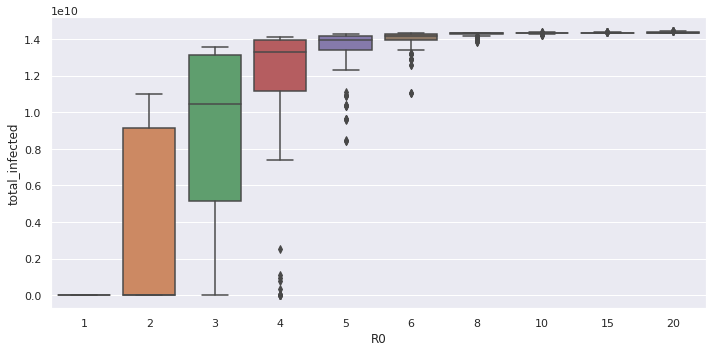

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.boxplot(x=df['R0'], y=df['total_infected'], ax=ax)
plt.tight_layout()

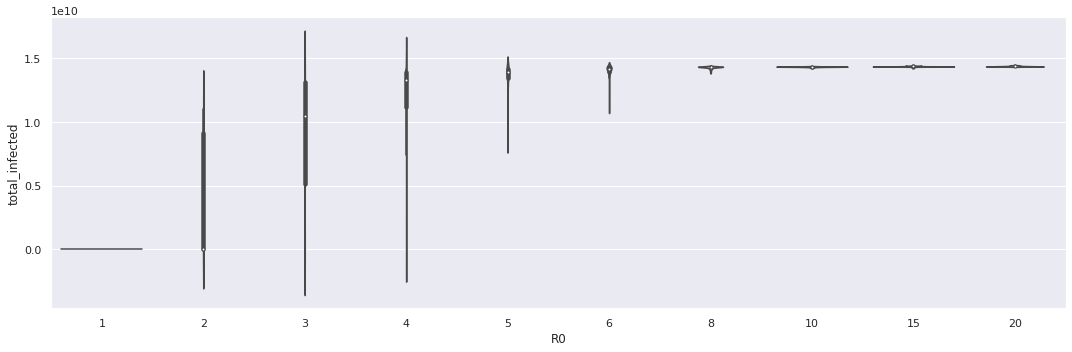

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.violinplot(x=df['R0'], y=df['total_infected'], ax=ax)
plt.tight_layout()

En este otro gráfico si que vemos claramente la relación entre el R0 y el total de infectados

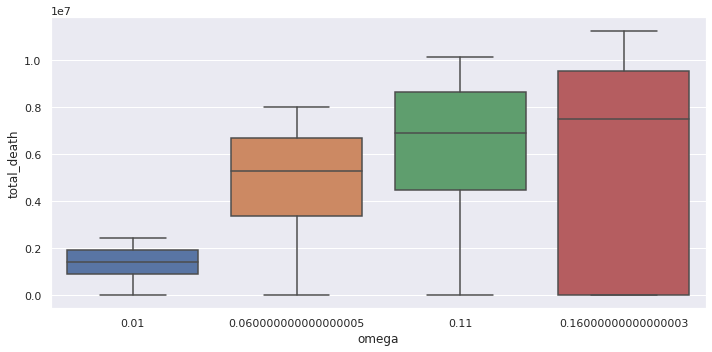

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.boxplot(x=df['omega'], y=df['total_death'], ax=ax)
plt.tight_layout()

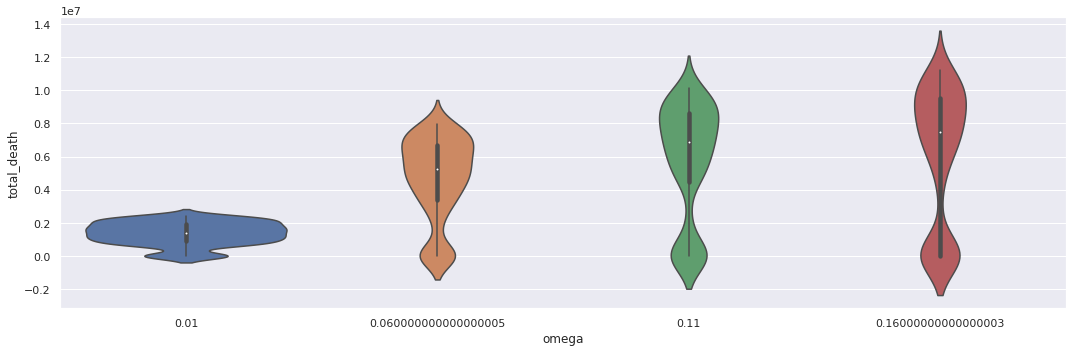

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.violinplot(x=df['omega'], y=df['total_death'], ax=ax)
plt.tight_layout()

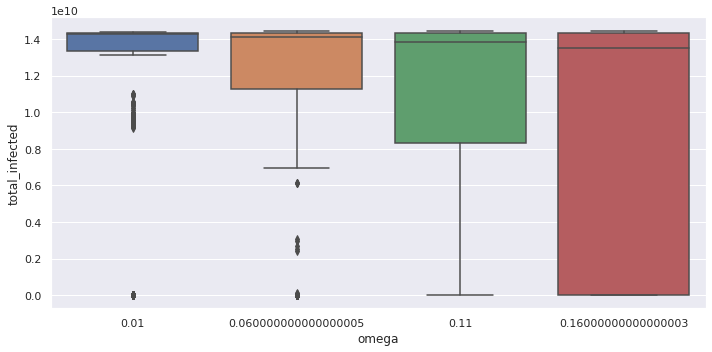

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.boxplot(x=df['omega'], y=df['total_infected'], ax=ax)
plt.tight_layout()

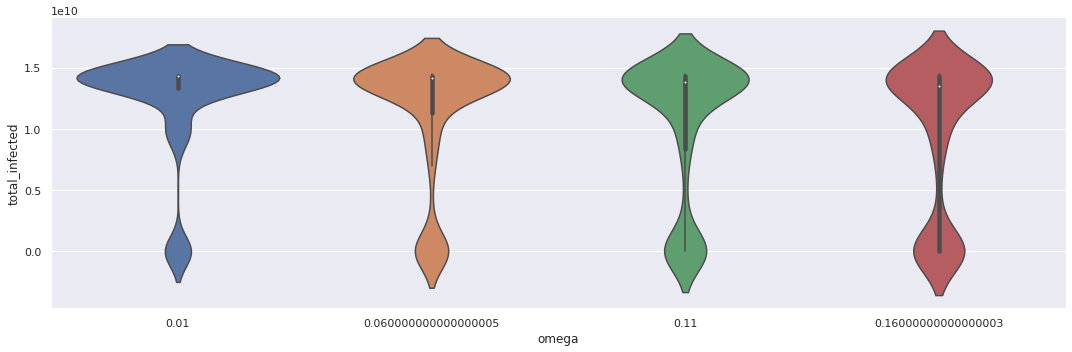

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.violinplot(x=df['omega'], y=df['total_infected'], ax=ax)
plt.tight_layout()

Parece que o bien se producen muchos infectados, o muy pocos, si pasa algo.. claro, depende de R0 el número de infectados! Si es bajo habrá pocos infectados.

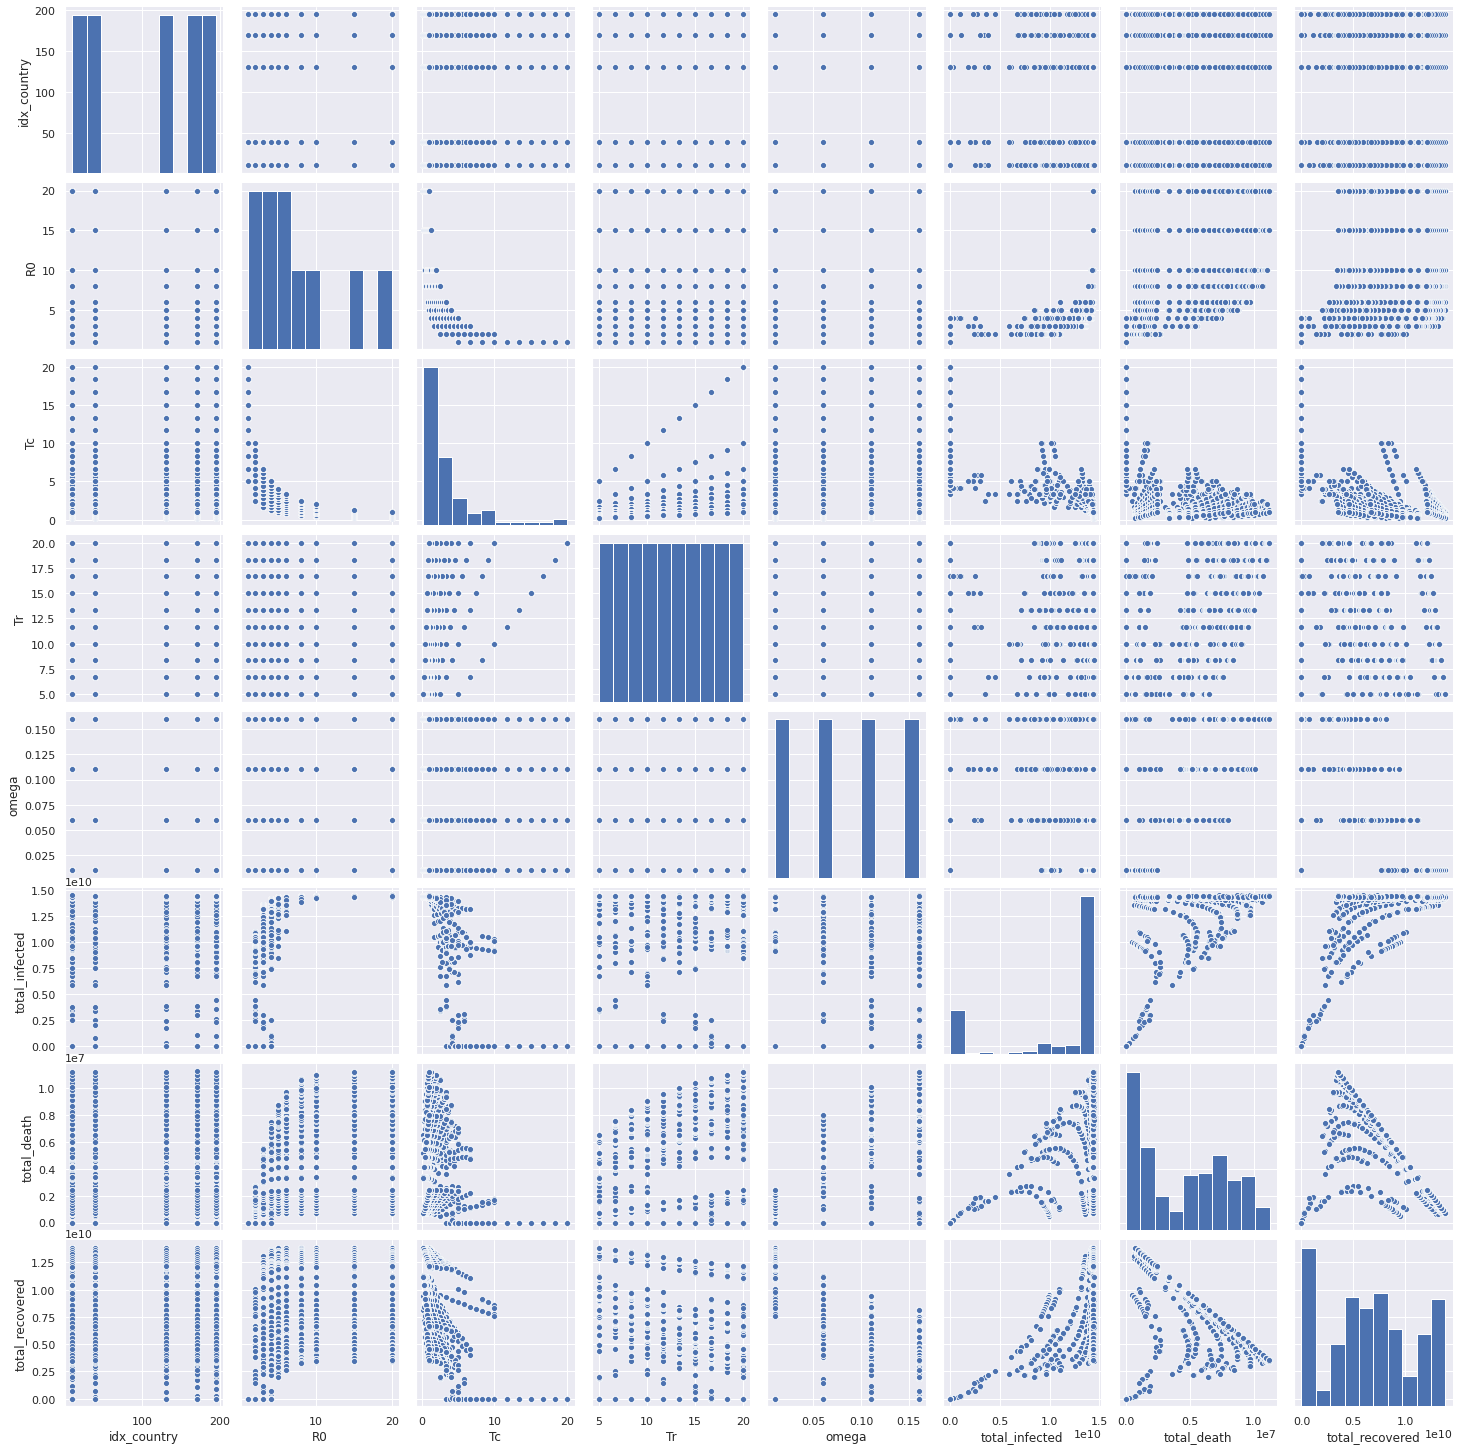

In [20]:
sns.pairplot(df)

## RANDOM FOREST

In [21]:
df

,initial_country,idx_country,R0,Tc,Tr,omega,total_infected,total_death,total_recovered
0,ESP,170,1,5.0,5.0,0.01,1.000000e+00,0.000000e+00,0.000000e+00
1,ESP,170,1,5.0,5.0,0.06,1.000000e+00,0.000000e+00,0.000000e+00
2,ESP,170,1,5.0,5.0,0.11,1.000000e+00,0.000000e+00,0.000000e+00
3,ESP,170,1,5.0,5.0,0.16,1.000000e+00,0.000000e+00,0.000000e+00
4,CHN,39,1,5.0,5.0,0.01,1.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...
1995,AUT,10,20,1.0,20.0,0.16,1.444776e+10,1.118887e+07,3.496521e+09
1996,MMR,130,20,1.0,20.0,0.01,1.433280e+10,2.424315e+06,1.212159e+10
1997,MMR,130,20,1.0,20.0,0.06,1.434552e+10,7.978767e+06,6.648968e+09
1998,MMR,130,20,1.0,20.0,0.11,1.434478e+10,1.010762e+07,4.594368e+09


In [22]:
# df_model = df.drop(['idx_country', 'total_infected', 'total_recovered'], axis=1)
df_model = df.drop(['initial_country','idx_country', 'total_infected', 'total_recovered'], axis=1)

df_model

,R0,Tc,Tr,omega,total_death
0,1,5.0,5.0,0.01,0.000000e+00
1,1,5.0,5.0,0.06,0.000000e+00
2,1,5.0,5.0,0.11,0.000000e+00
3,1,5.0,5.0,0.16,0.000000e+00
4,1,5.0,5.0,0.01,0.000000e+00
...,...,...,...,...,...
1995,20,1.0,20.0,0.16,1.118887e+07
1996,20,1.0,20.0,0.01,2.424315e+06
1997,20,1.0,20.0,0.06,7.978767e+06
1998,20,1.0,20.0,0.11,1.010762e+07


In [23]:
X = df_model.drop('total_death', axis=1)
y = df_model['total_death']

In [24]:
X_train_validation, X_test, y_train_validation, y_test = train_test_split(X, y, random_state=42)

In [25]:
categorical_pipe = Pipeline(
    [
        ('onehot', OneHotEncoder()),
    ]
)


preprocessing = ColumnTransformer([("cat", categorical_pipe, ["initial_country"])])

rnd_reg = Pipeline(
    [
        ("preprocess", preprocessing),
        ("regressor", RandomForestRegressor(random_state=42)),
    ]
)


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
# Number of features to consider at every split
max_features = ["auto", "sqrt"]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {
    "regressor__n_estimators": n_estimators,
    "regressor__max_features": max_features,
    "regressor__max_depth": max_depth,
    "regressor__min_samples_split": min_samples_split,
    "regressor__min_samples_leaf": min_samples_leaf,
    "regressor__bootstrap": bootstrap,
}

random_grid = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}

In [26]:
# gridsearch = RandomizedSearchCV(
#     rnd_reg, random_grid, random_state=42, n_iter=500, n_jobs=-1, verbose=2)
# gridsearch.fit(X_train_validation, y_train_validation)

# gridsearch = RandomizedSearchCV(
#     RandomForestRegressor(random_state=42), random_grid, random_state=42, n_iter=500, n_jobs=-1, verbose=2)
# gridsearch.fit(X_train_validation, y_train_validation)
# joblib.dump(gridsearch, '../models/gridsearch_randomf_deaths_rev2.pkl')

In [27]:
gridsearch = joblib.load('../models/gridsearch_randomf_deaths_k.pkl')

In [28]:
results_searchcv(gridsearch, X_test, y_test)

The best score is:
0.9958193750282751
The best parameters found are:
{'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': False}
The score in test is:
0.9986383538946607
The MAE is:
44148.22946217095
The RMSE is:
16790055470.285212
The explained variance score is:
0.9986385374330535


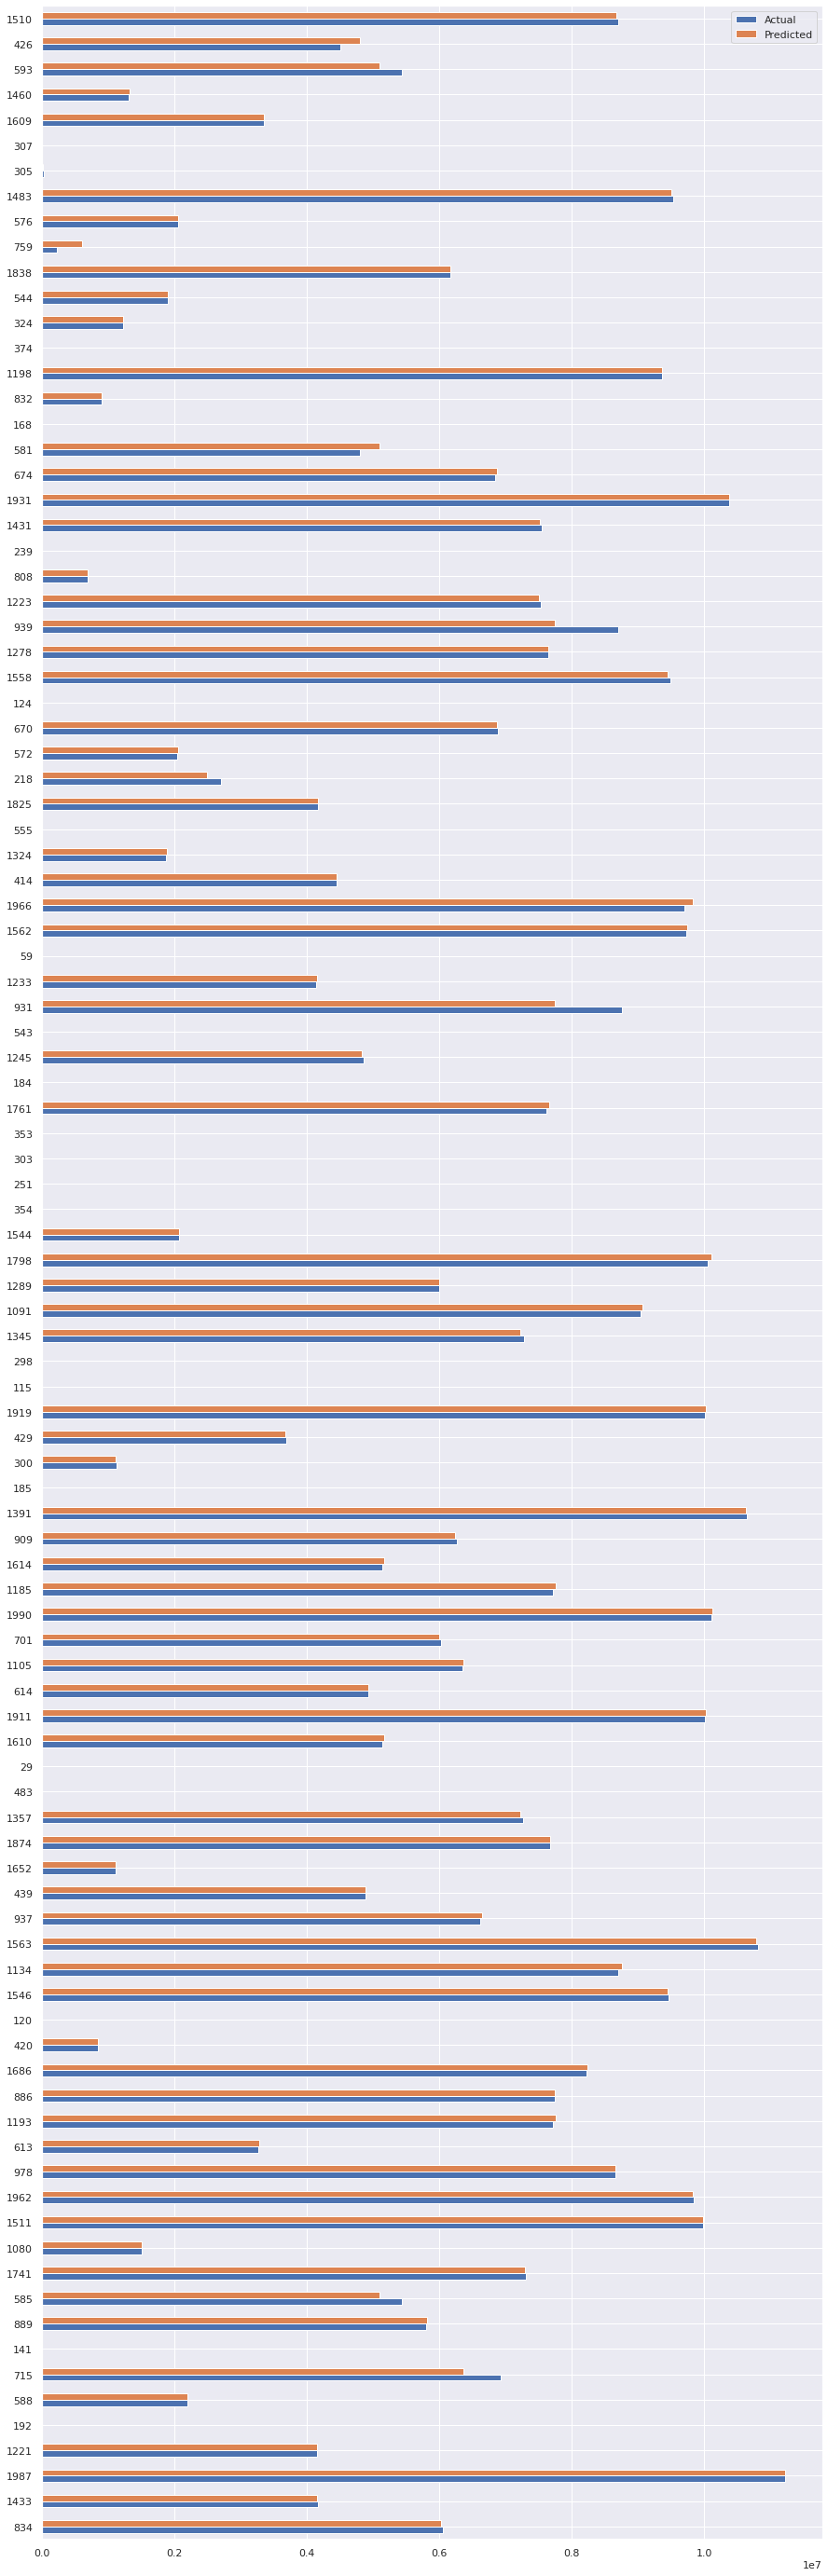

In [29]:
y_predicted = gridsearch.predict(X_test)
df_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted})
df_predicted.sample(100).plot(kind='barh',figsize=(15,50))
plt.show()